<a href="https://colab.research.google.com/github/PacktPublishing/Hands-On-Computer-Vision-with-Detectron2/blob/main/Chapter02/Detectron2-Chapter02-Instance%20Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation

Should change runtime to have GPU Hardware accelerator: Runtime > Change runtime > Hardware accelerator: GPU.

In [ ]:
!python --version

In [ ]:
import torch
print(torch.__version__)

1.12.1+cu113


In [ ]:
!python -m pip install \
'git+https://github.com/facebookresearch/detectron2.git'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-x7_tsl5s
  Running command git clone -q https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-x7_tsl5s
     |████████████████████████████████| 50 kB 5.7 MB/s 
     |████████████████████████████████| 79 kB 9.2 MB/s 
     |████████████████████████████████| 151 kB 68.8 MB/s 
     |████████████████████████████████| 1.4 MB 61.5 MB/s 
     |████████████████████████████████| 509 kB 70.1 MB/s 
     |████████████████████████████████| 248 kB 71.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 96 kB 6.4 MB/s 
     |████████████████████████████████| 843 kB 61.7 MB/s 
     |████████████████████████████████| 117 kB 63.7 MB/s 
  Created whee

# Get a predictor

In [ ]:
import detectron2
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
# Suppress some user warnings
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
# Select a model
config_file = "COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml"
checkpoint_url = "COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml"
# Create a configuration file
cfg = get_cfg()
config_file = model_zoo.get_config_file(config_file)
cfg.merge_from_file(config_file)
# Download weights
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(checkpoint_url)
score_thresh_test = 0.95
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = score_thresh_test
predictor = DefaultPredictor(cfg)

# Perform inference

In [ ]:
!wget https://raw.githubusercontent.com/PacktPublishing/Hands-On-Computer-Vision-with-Detectron2/main/datasets/960x720image/input.jpg

In [ ]:
import cv2
input_url = "input.jpg"
img = cv2.imread(input_url)
output = predictor(img)

In [ ]:
print(output)

{'instances': Instances(num_instances=4, image_height=720, image_width=960, fields=[pred_boxes: Boxes(tensor([[298.0179, 194.8398, 438.7511, 653.0747],
        [489.3330, 335.9763, 687.1323, 641.1672],
        [419.5230, 250.9282, 500.0356, 629.5453],
        [451.5580, 395.0862, 557.6307, 665.5721]], device='cuda:0')), scores: tensor([0.9985, 0.9957, 0.9941, 0.9934], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0'), pred_masks: tensor([[[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]],

        [[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],

# Visualization

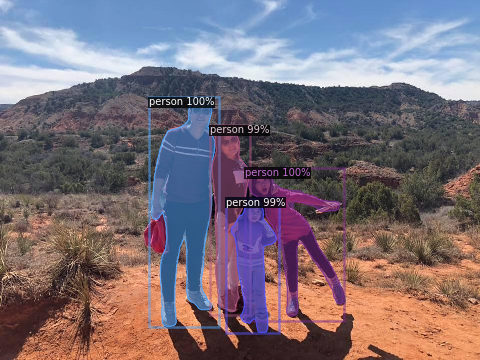

In [ ]:
from google.colab.patches import cv2_imshow
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
metadata = MetadataCatalog.get(cfg.DATASETS.TRAIN[0])
v = Visualizer(img[:, :, ::-1], metadata, scale=0.5)
instances = output["instances"].to("cpu")
annotated_img = v.draw_instance_predictions(instances)
cv2_imshow(annotated_img.get_image()[:, :, ::-1])